<a href="https://colab.research.google.com/github/dharmendra-chouhan/s2datascience/blob/master/Extracted_Construction_Worker_Patient_Details_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  District wise 
          Gender wise Registration
          Health status wise Registration
          District wise Registration
          District wise Camp

2. 
District wise Registration Count
3.   District wise maximum Registration 
4.   District wise minimum Registration 
5.   District and Gender wise data 
6.   Gender wise Worker Patient
7.   Age wise Registration Count
8.  District and health status wise data



In [0]:
import pandas as pd

# **Extracted Construction Worker Patient Details Files**

---




**Read a csv file from a Google drive**

In [7]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1G9LdZeCed2psskC9MLuORz3tA9mkN_-M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ExtractedConstructionWorkerPatient.csv')  

#3. Read file as panda dataframe
import pandas as pd
df1 = pd.read_csv('ExtractedConstructionWorkerPatient.csv') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Columns of the Extracted Construction Worker Patient Details Files:**

In [8]:
print(df1.columns)

Index(['campid', 'campno', 'camplocation', 'campdate', 'distlgdcode',
       'distname', 'regdid', 'regdno', 'regdno_audio', 'fullname',
       'fullname_audio', 'mobile', 'mobile_audio', 'age', 'age_audio',
       'gender', 'gender_audio', 'docremark', 'health_status', 'bmi',
       'weight_kgs', 'height_cms', 'bloodsugar_f', 'bloodsugar_pp',
       'bloodsugar_r', 'pulserate', 'testid', 'testname', 'right_remark',
       'left_remark', 'testname_lft', 'fev1', 'fevi_fvc', 'pef', 'fef_25_75',
       'fivc', 'pif', 'fet', 'result', 'diseaseid', 'diseasename',
       'disease_status', 'campdate_ph', 'distlgdcode_ph', 'isalcohol',
       'issmoking', 'istobaco', 'isdrug', 'phy_exam_testid',
       'phy_exam_testname', 'phy_exam_remark', 'testid_vi', 'testname_vi',
       'diesease_injury_evidence_right_vi', 'diesease_injury_evidence_left_vi',
       'other_remark_vi', 'suggestion_vi', 'finalremark_vi',
       'wearingglasses_vi', 'leftremark_vi', 'rightremark_vi',
       'nearvisionremark

**Print first five Record from datafram**

In [9]:
df1.head(5)

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,regdno_audio,fullname,fullname_audio,mobile,mobile_audio,age,age_audio,gender,gender_audio,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
2,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,9.0,Congenital Abnormality,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
3,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,1.0,Asthama,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
4,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,10.0,Gastrointestinal Ulcer,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision


**District wise health status, gender,camp and Registration**

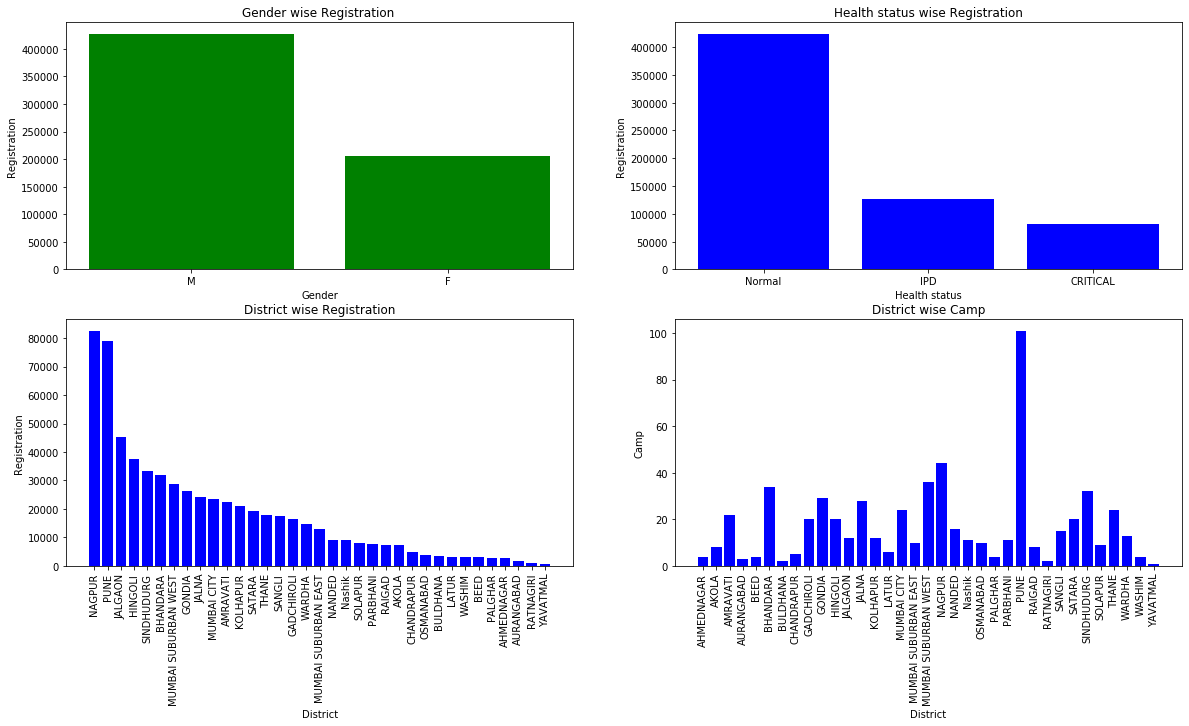

In [131]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
plt.rcParams['figure.figsize'] =[20,10]


fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


healthhcount = df1['health_status'].value_counts().to_dict()
groupnamecount = df1['gender'].value_counts().to_dict()
distnamecount = df1['distname'].value_counts().to_dict()
distwise_reg = df1.groupby("distname").agg({"camplocation": pd.Series.nunique}).reset_index()


ax1.title.set_text('Gender wise Registration ')
service_value1=groupnamecount.values()
service_keys1=groupnamecount.keys()
ax1.set_xlabel('Gender')
ax1.set_ylabel('Registration')
ax1.bar(service_keys1,service_value1, color = 'green')


ax2.title.set_text('Health status wise Registration')
service_value1=healthhcount.values()
service_keys1=healthhcount.keys()
ax2.set_xlabel('Health status')
ax2.set_ylabel('Registration')
ax2.bar(service_keys1,service_value1, color = 'blue')



ax3.title.set_text('District wise Registration')
distnamecount_value1=distnamecount.values()
distnamecount_keys1=distnamecount.keys()
ax3.set_xlabel('District')
ax3.set_ylabel('Registration')
ax3.bar(distnamecount_keys1,distnamecount_value1, color = 'blue')
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)


ax4.title.set_text('District wise Camp')
distnamecount_value1=distwise_reg['camplocation']
distnamecount_keys1=distwise_reg['distname']
ax4.set_xlabel('District')
ax4.set_ylabel('Camp')
ax4.bar(distnamecount_keys1,distnamecount_value1, color = 'blue')
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)


**District wise Registration Count**

In [10]:
import pandas as pd
distwise_reg = df1.groupby("distname").agg({"regdid": pd.Series.nunique})
distwise_reg.sort_values(by=['regdid'])


,regdid
distname,
YAVATMAL,64
RATNAGIRI,113
AURANGABAD,161
AHMEDNAGAR,275
PALGHAR,277
BEED,310
WASHIM,311
LATUR,312
BULDHANA,370


**District wise maximum Registration Count**

In [11]:
distwise_reg[distwise_reg.regdid == distwise_reg.regdid.max()]

,regdid
distname,
NAGPUR,8194


**District wise minimum Registration Count**

In [12]:
distwise_reg[distwise_reg.regdid == distwise_reg.regdid.min()]


,regdid
distname,
YAVATMAL,64


***Gender wise Worker Patient***

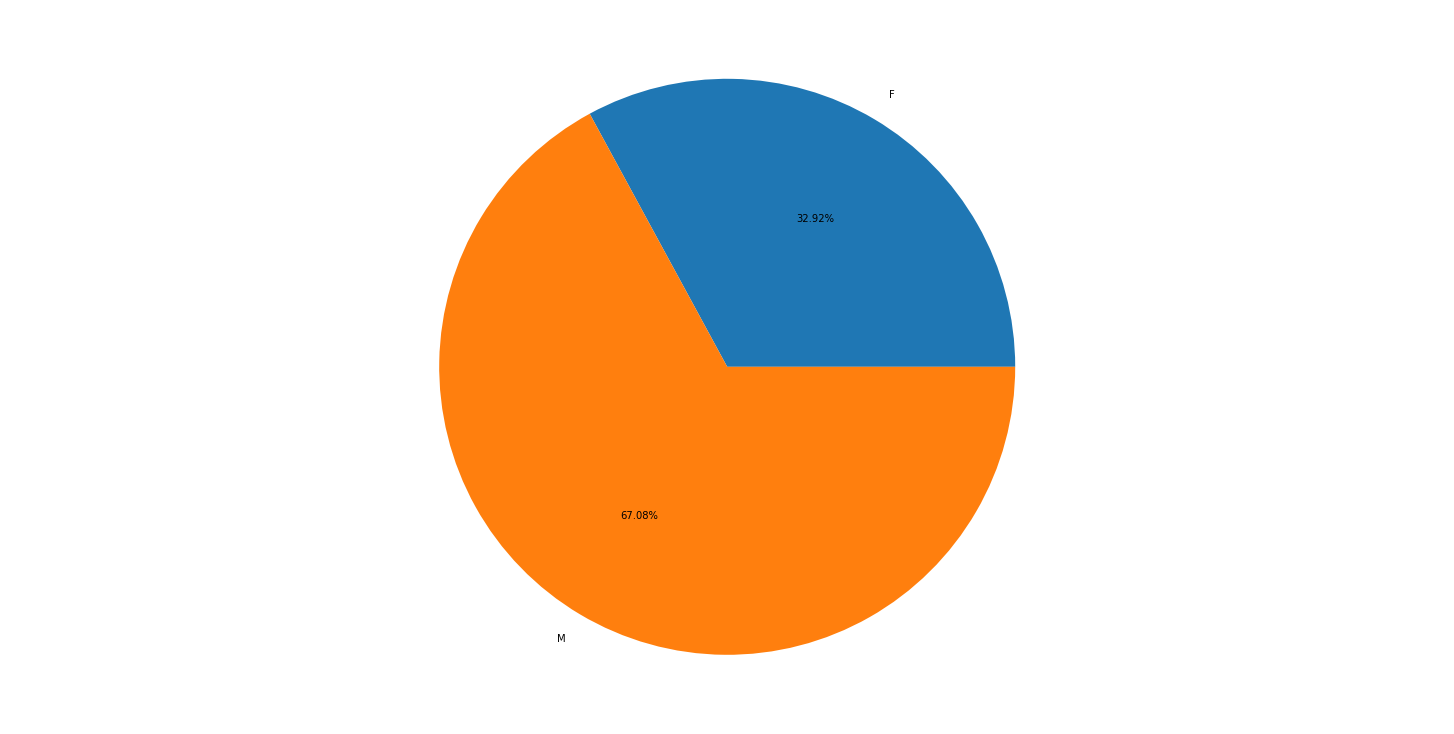

In [59]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
distwise_reg = df1.groupby("gender").agg({"regdid": pd.Series.nunique}).reset_index()
distname =list(distwise_reg['gender'])
distregdid =list(distwise_reg['regdid'])
ax.pie(distregdid , labels =distname ,autopct='%1.2f%%')
plt.show()

**District wise Gender wise count**

In [13]:
%%html 
<marquee style='width: 100%; color: blue;'><b>District wise Registration Count!</b></marquee>

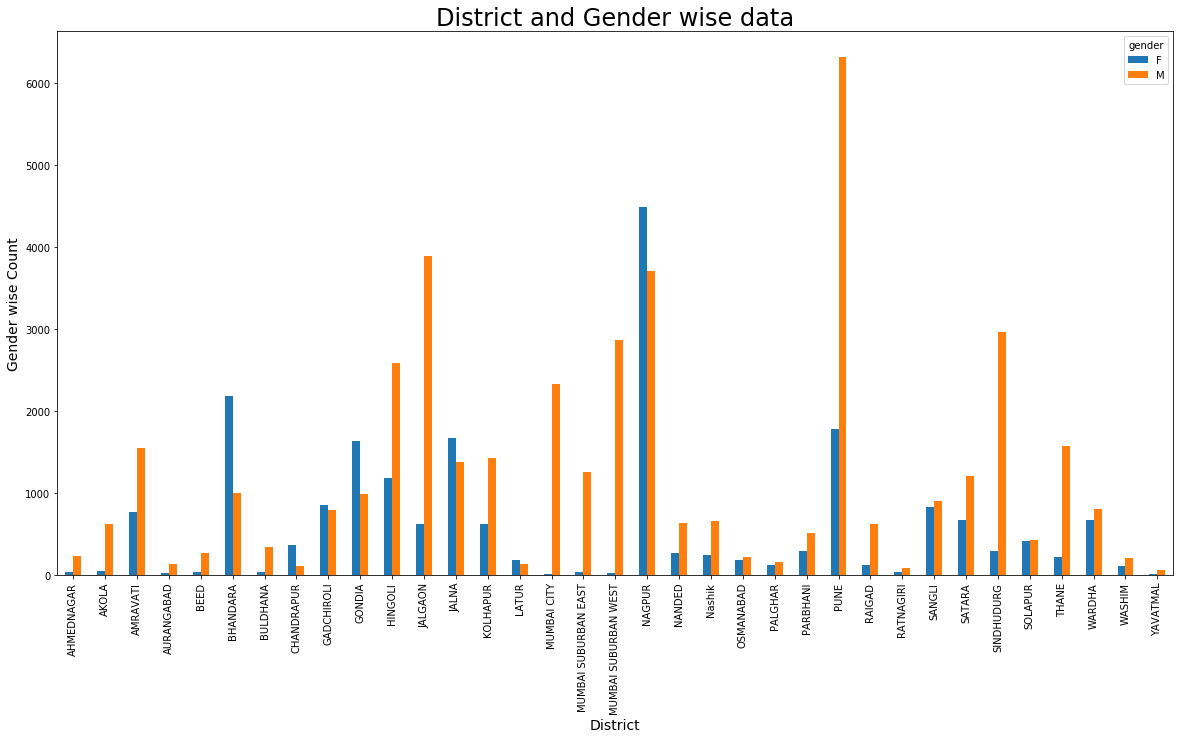

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1.groupby(['gender','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['distname'])
distwise_reg = distwise_reg.pivot_table('regdid', ['distname'], 'gender')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[20,10]
df = pd.DataFrame(distwise_reg)

df.plot(x="distname", y=['F','M'], kind="bar")
# plt.set_xlabel("District")
# plt.set_ylabel("Gender wise Count")
plt.xticks(rotation=90)
plt.title('District and Gender wise data',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Gender wise Count',fontsize=14)
plt.show()

**Age wise Registration Count**

In [15]:
import pandas as pd
distwise_reg = df1.groupby("age").agg({"regdid": pd.Series.nunique})
agewisereg=distwise_reg.sort_values(by=['regdid'])
print(str('Age').ljust(50), 'Age wise count')
print('------------------------------------------------------------------')
agewisereg=agewisereg.sort_values(by=['age'])
for index1, row in agewisereg.iterrows():
    print(str(int(index1)).ljust(50), str(row['regdid']))

Age                                                Age wise count
------------------------------------------------------------------
0                                                  108
2                                                  1
18                                                 166
19                                                 528
20                                                 797
21                                                 1009
22                                                 1136
23                                                 1239
24                                                 1563
25                                                 1919
26                                                 1580
27                                                 1675
28                                                 1939
29                                                 1934
30                                                 3272
31                                

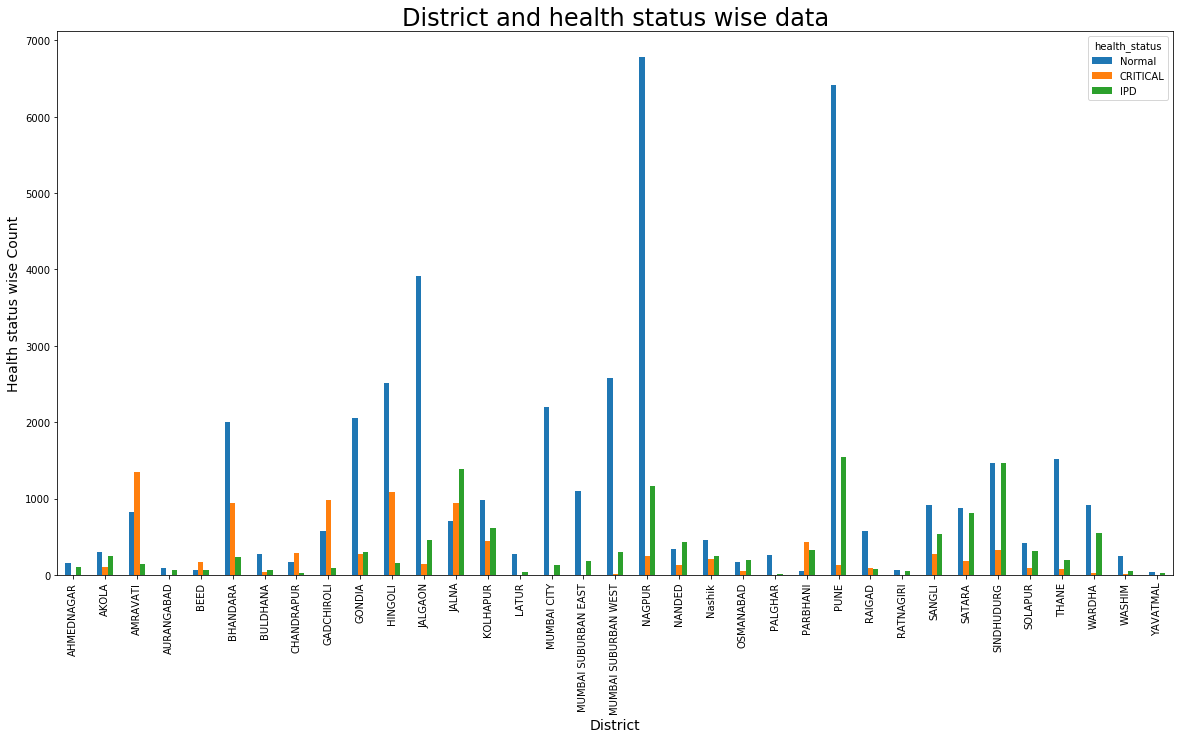

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1.groupby(['health_status','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['distname'])
distwise_reg = distwise_reg.pivot_table('regdid', ['distname'], 'health_status')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[20,10]
df = pd.DataFrame(distwise_reg)

df.plot(x="distname", y=['Normal','CRITICAL','IPD'], kind="bar")
plt.xticks(rotation=90)
plt.title('District and health status wise data',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Health status wise Count',fontsize=14)
plt.show()

In [34]:
df1.head()

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,regdno_audio,fullname,fullname_audio,mobile,mobile_audio,age,age_audio,gender,gender_audio,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
2,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,9.0,Congenital Abnormality,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
3,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,1.0,Asthama,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
4,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,10.0,Gastrointestinal Ulcer,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
